In [1]:
import keras
from keras import layers

encoding_dim = 32
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu',)(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)

#model maps an input to reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
#model maps an input to encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 16s 12ms/step - loss: 0.3833 - val_loss: 0.1845
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1766 - val_loss: 0.1525
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1486 - val_loss: 0.1331
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1309 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1203 - val_loss: 0.1133
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1129 - val_loss: 0.1075
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1076 - val_loss: 0.1033
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1034 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1005 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0984 - val_l

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


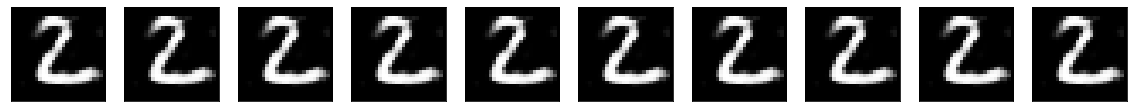

In [9]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[1].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1)
  plt.imshow(decoded_imgs[1].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [10]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [11]:
#Deep Autoencoder using a stack of layers as an encoder
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [12]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3364 - val_loss: 0.1675
Epoch 2/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1583 - val_loss: 0.1355
Epoch 3/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1331 - val_loss: 0.1221
Epoch 4/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1211 - val_loss: 0.1147
Epoch 5/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1146 - val_loss: 0.1098
Epoch 6/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1104 - val_loss: 0.1065
Epoch 7/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1069 - val_loss: 0.1040
Epoch 8/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1047 - val_loss: 0.1021
Epoch 9/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1025 - val_loss: 0.1002
Epoch 10/100
235/235 [==============================] - 3s 15ms/step - loss: 0.100

In [13]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [15]:
#Generate noisy images
#noise_factor = 0.5
#x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
#x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)

#x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
#x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)



In [16]:
#tensorboard --logdir=/tmp/autoencoder

In [17]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/10
469/469 [==============================] - 83s 173ms/step - loss: 0.3322 - val_loss: 0.1404
Epoch 2/10
469/469 [==============================] - 80s 171ms/step - loss: 0.1356 - val_loss: 0.1212
Epoch 3/10
469/469 [==============================] - 80s 171ms/step - loss: 0.1202 - val_loss: 0.1151
Epoch 4/10
469/469 [==============================] - 80s 171ms/step - loss: 0.1146 - val_loss: 0.1101
Epoch 5/10
469/469 [==============================] - 80s 171ms/step - loss: 0.1107 - val_loss: 0.1076
Epoch 6/10
469/469 [==============================] - 80s 171ms/step - loss: 0.1083 - val_loss: 0.1056
Epoch 7/10
469/469 [==============================] - 80s 171ms/step - loss: 0.1061 - val_loss: 0.1050
Epoch 8/10
469/469 [==============================] - 80s 171ms/step - loss: 0.1050 - val_loss: 0.1036
Epoch 9/10
469/469 [==============================] - 81s 172ms/step - loss: 0.1038 - val_loss: 0.1019
Epoch 10/10
469/469 [==============================] - 80s 171ms/step - l

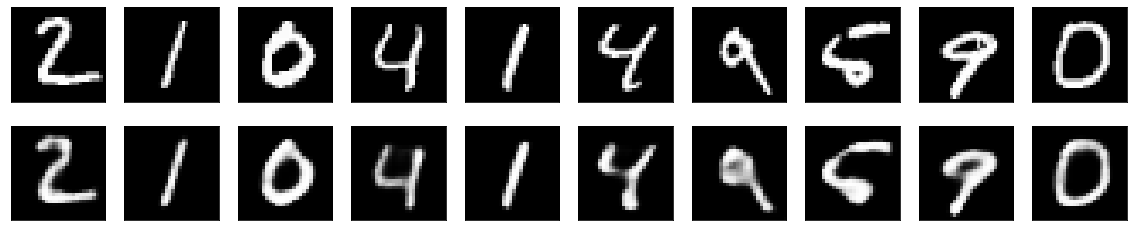

In [18]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


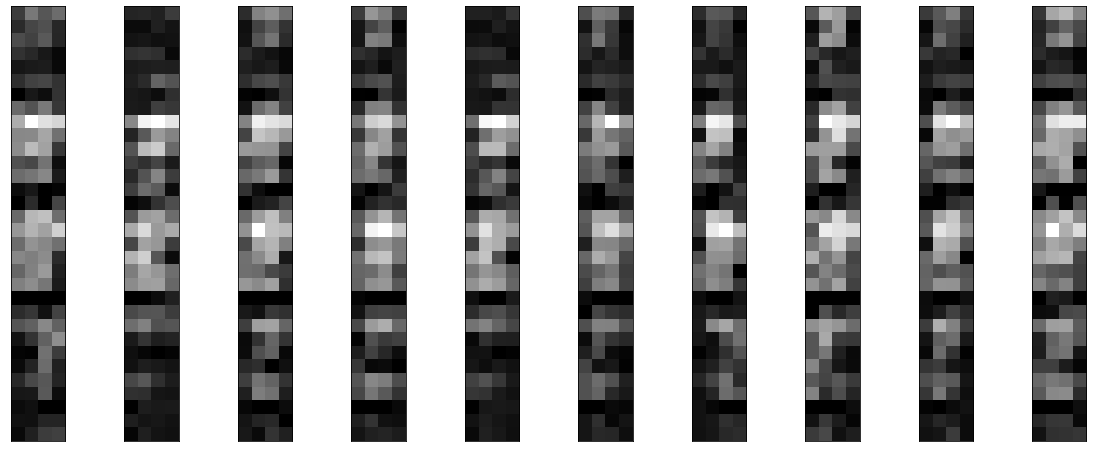

In [19]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
#Image Denoising with Convolutional Autoencoder
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

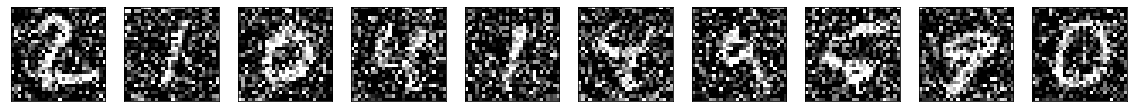

In [21]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [23]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/10
469/469 [==============================] - 148s 314ms/step - loss: 0.2482 - val_loss: 0.1169
Epoch 2/10
469/469 [==============================] - 146s 311ms/step - loss: 0.1151 - val_loss: 0.1088
Epoch 3/10
469/469 [==============================] - 148s 315ms/step - loss: 0.1084 - val_loss: 0.1044
Epoch 4/10
469/469 [==============================] - 148s 316ms/step - loss: 0.1048 - val_loss: 0.1023
Epoch 5/10
469/469 [==============================] - 148s 315ms/step - loss: 0.1027 - val_loss: 0.1005
Epoch 6/10
469/469 [==============================] - 146s 312ms/step - loss: 0.1013 - val_loss: 0.0995
Epoch 7/10
469/469 [==============================] - 148s 315ms/step - loss: 0.1002 - val_loss: 0.0986
Epoch 8/10
469/469 [==============================] - 157s 335ms/step - loss: 0.0995 - val_loss: 0.0980
Epoch 9/10
469/469 [==============================] - 163s 348ms/step - loss: 0.0987 - val_loss: 0.0978
Epoch 10/10
469/469 [==============================] - 161s 343m